# Gerschgorin Disks

Gerschgorin's theorem, introduced by the Russian mathematician Semyon Aranovich Gerschgorin in 1931, is a fundamental result in linear algebra that provides information about the location of eigenvalues of a square matrix. The theorem is based on the concept of Gerschgorin disks.

A Gerschgorin disk associated with a matrix A is a circular region in the complex plane. Each Gerschgorin disk is centered at the value of a diagonal element of A, and its radius is equal to the sum of the absolute values of the off-diagonal elements in the corresponding row.

The main aim of Gerschgorin's theorem is to provide bounds for the location of eigenvalues of the matrix A. Specifically, it states that all eigenvalues of A must lie within the union of the Gerschgorin disks.

In other words, if λ is an eigenvalue of A, then it must satisfy at least one of the following conditions:

|λ - A(i, i)| <= R(i) for some i, which means λ lies inside the Gerschgorin disk associated with the i-th row.
R(i) is the sum of the absolute values of the off-diagonal elements in the i-th row of A.

There is a Gerschgorin disk that contains λ entirely within its boundary.

In practical terms, Gerschgorin's theorem allows us to quickly estimate the location of eigenvalues of a matrix without computing the actual eigenvalues. This can be particularly useful when dealing with large matrices, as it provides a simple graphical representation of the potential eigenvalue locations. The theorem also helps in identifying the possible range of eigenvalues, which can be helpful in certain applications, such as stability analysis in the context of numerical methods or dynamical systems.

In [16]:
import numpy as np
from numpy import linalg 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

In [17]:
def Gerschgorin(A):

    n = len(A)
    eval, evec = linalg.eig(A)

    patches = []
    
    # draw discs
    
    for i in range(n):
        xi = np.real(A[i,i])
        yi = np.imag(A[i,i])
        ri = np.sum(np.abs(A[i,:])) - np.abs(A[i,i]) 
        
        circle = Circle((xi, yi), ri)
        patches.append(circle)

    fig, ax = plt.subplots()

    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.1)
    ax.add_collection(p)
    plt.axis('equal')
    
    for xi, yi in zip(np.real(eval), np.imag(eval)):
        plt.plot(xi, yi,'o')
    
    plt.show()

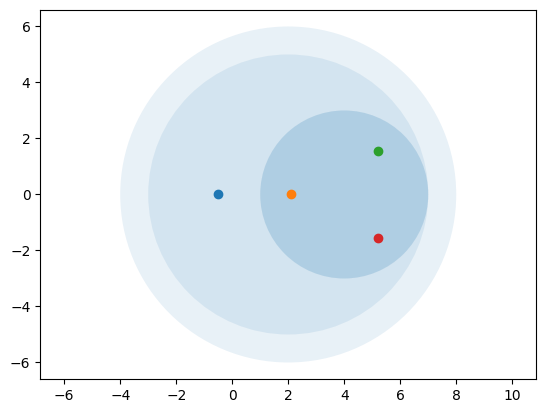

In [18]:
B = np.array([
  [2, 3, 1, -1],
  [0, 4, -2, 1],
  [3, 1, 2, -2],
  [0, 0, -3, 4]])
Gerschgorin(B)